<a href="https://colab.research.google.com/github/Igor-source/Diploma_demo/blob/main/%D0%A2%D0%BE_%D1%87%D1%82%D0%BE_%D1%81%D1%83%D1%81%D0%B0%D0%BD_%D1%81%D0%B0%D0%BC_%D1%81%D0%BA%D0%B0%D1%87%D0%B0%D0%BB_%D0%B8_%D1%8F_%D1%82%D0%B5%D0%BF%D0%B5%D1%80%D1%8C_%D0%BF%D1%80%D0%BE%D0%B1%D1%83%D1%8E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rdkit-pypi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 36.3 MB/s eta 0:00:00


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from sklearn.decomposition import PCA

import geopandas as gpd

In [ ]:
target = pd.read_csv('/content/drive/MyDrive/Susan_project/CSV_for_diploma/filtered_bacteria_data.csv', low_memory=False)
target

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,Inconclusive,4084691,[],CHEMBL1614433,PUBCHEM_BIOASSAY: Counterscreen for APE1 Inhib...,F,NaN,NaN,BAO_0000186,...,Escherichia coli K-12,Endonuclease 4,83333.0,NaN,NaN,Potency,um,UO_0000065,NaN,10.00
1,NaN,Inconclusive,4361393,[],CHEMBL1614174,PUBCHEM_BIOASSAY: qHTS Assay for Inhibitors of...,F,NaN,NaN,BAO_0000186,...,Bacillus subtilis,4'-phosphopantetheinyl transferase ffp,1423.0,NaN,NaN,Potency,um,UO_0000065,NaN,100.00
2,NaN,Average; N=2,20163247,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4296185,Antibacterial activity against Escherichia col...,F,NaN,NaN,BAO_0000201,...,Escherichia coli,Escherichia coli,562.0,NaN,NaN,Inhibition,%,UO_0000187,NaN,-2.76
3,NaN,Average; N=2,20163248,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4296186,Antibacterial activity against Klebsiella pneu...,F,NaN,NaN,BAO_0000201,...,Klebsiella pneumoniae,Klebsiella pneumoniae,573.0,NaN,NaN,Inhibition,%,UO_0000187,NaN,-2.00
4,NaN,Average; N=2,20163249,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4296187,Antibacterial activity against Pseudomonas aer...,F,NaN,NaN,BAO_0000201,...,Pseudomonas aeruginosa,Pseudomonas aeruginosa,287.0,NaN,NaN,Inhibition,%,UO_0000187,NaN,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85747,NaN,NaN,14563013,[],CHEMBL3232251,Mutagenic activity in Salmonella typhimurium T...,T,NaN,NaN,BAO_0000179,...,Salmonella enterica subsp. enterica serovar Ty...,Salmonella typhimurium,90371.0,NaN,NaN,M50,%,UO_0000187,NaN,0.00
85748,NaN,NaN,14563044,[],CHEMBL3232251,Mutagenic activity in Salmonella typhimurium T...,T,NaN,NaN,BAO_0000179,...,Salmonella enterica subsp. enterica serovar Ty...,Salmonella typhimurium,90371.0,NaN,NaN,log(M50),NaN,NaN,NaN,0.00
85749,NaN,NaN,14639467,[],CHEMBL3252983,Mutagenicity in Salmonella typhimurium TA98 as...,T,NaN,NaN,BAO_0000181,...,Salmonella enterica subsp. enterica serovar Ty...,Salmonella typhimurium,90371.0,NaN,NaN,Activity,/nmol,NaN,NaN,100.00
85750,NaN,NaN,14639480,[],CHEMBL3252985,Toxicity in Salmonella typhimurium TA98 assess...,A,NaN,NaN,BAO_0000181,...,Salmonella enterica subsp. enterica serovar Ty...,Salmonella typhimurium,90371.0,NaN,NaN,Activity,ug,UO_0000023,NaN,5.00


In [ ]:
target['target_organism'].nunique()

449

In [ ]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85752 entries, 0 to 85751
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   action_type                35 non-null     object 
 1   activity_comment           6086 non-null   object 
 2   activity_id                85752 non-null  int64  
 3   activity_properties        85752 non-null  object 
 4   assay_chembl_id            85752 non-null  object 
 5   assay_description          85752 non-null  object 
 6   assay_type                 85752 non-null  object 
 7   assay_variant_accession    73 non-null     object 
 8   assay_variant_mutation     73 non-null     object 
 9   bao_endpoint               85752 non-null  object 
 10  bao_format                 85752 non-null  object 
 11  bao_label                  85752 non-null  object 
 12  canonical_smiles           85199 non-null  object 
 13  data_validity_comment      440 non-null    obj

In [ ]:
target.drop_duplicates(inplace=True)

In [ ]:
additional_drop = ['action_type','activity_comment','assay_variant_accession','assay_variant_mutation','data_validity_description','data_validity_comment','ligand_efficiency','pchembl_value','upper_value']
nan_columns = list(target.columns[target.isna().all()]) + additional_drop
nan_columns

['standard_text_value',
 'standard_upper_value',
 'text_value',
 'toid',
 'action_type',
 'activity_comment',
 'assay_variant_accession',
 'assay_variant_mutation',
 'data_validity_description',
 'data_validity_comment',
 'ligand_efficiency',
 'pchembl_value',
 'upper_value']

In [ ]:
# i dropped the columns with value NaN
target = target.drop(columns=nan_columns)
target

,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,bao_endpoint,bao_format,bao_label,canonical_smiles,document_chembl_id,...,standard_units,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,type,units,uo_units,value
0,4084691,[],CHEMBL1614433,PUBCHEM_BIOASSAY: Counterscreen for APE1 Inhib...,F,BAO_0000186,BAO_0000019,assay format,CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(F)ccc1-2,CHEMBL1201862,...,nM,10000.00,CHEMBL1293285,Escherichia coli K-12,Endonuclease 4,83333.0,Potency,um,UO_0000065,10.00
1,4361393,[],CHEMBL1614174,PUBCHEM_BIOASSAY: qHTS Assay for Inhibitors of...,F,BAO_0000186,BAO_0000019,assay format,CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(F)ccc1-2,CHEMBL1201862,...,nM,100000.00,CHEMBL1293248,Bacillus subtilis,4'-phosphopantetheinyl transferase ffp,1423.0,Potency,um,UO_0000065,100.00
2,20163247,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4296185,Antibacterial activity against Escherichia col...,F,BAO_0000201,BAO_0000218,organism-based format,CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(F)ccc1-2,CHEMBL4513141,...,%,-2.76,CHEMBL354,Escherichia coli,Escherichia coli,562.0,Inhibition,%,UO_0000187,-2.76
3,20163248,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4296186,Antibacterial activity against Klebsiella pneu...,F,BAO_0000201,BAO_0000218,organism-based format,CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(F)ccc1-2,CHEMBL4513141,...,%,-2.00,CHEMBL350,Klebsiella pneumoniae,Klebsiella pneumoniae,573.0,Inhibition,%,UO_0000187,-2.00
4,20163249,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4296187,Antibacterial activity against Pseudomonas aer...,F,BAO_0000201,BAO_0000218,organism-based format,CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(F)ccc1-2,CHEMBL4513141,...,%,6.15,CHEMBL348,Pseudomonas aeruginosa,Pseudomonas aeruginosa,287.0,Inhibition,%,UO_0000187,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85747,14563013,[],CHEMBL3232251,Mutagenic activity in Salmonella typhimurium T...,T,BAO_0000179,BAO_0000218,organism-based format,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL3227953,...,%,0.00,CHEMBL351,Salmonella enterica subsp. enterica serovar Ty...,Salmonella typhimurium,90371.0,M50,%,UO_0000187,0.00
85748,14563044,[],CHEMBL3232251,Mutagenic activity in Salmonella typhimurium T...,T,BAO_0000179,BAO_0000218,organism-based format,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL3227953,...,NaN,0.00,CHEMBL351,Salmonella enterica subsp. enterica serovar Ty...,Salmonella typhimurium,90371.0,log(M50),NaN,NaN,0.00
85749,14639467,[],CHEMBL3252983,Mutagenicity in Salmonella typhimurium TA98 as...,T,BAO_0000181,BAO_0000218,organism-based format,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL3244252,...,/nmol,100.00,CHEMBL351,Salmonella enterica subsp. enterica serovar Ty...,Salmonella typhimurium,90371.0,Activity,/nmol,NaN,100.00
85750,14639480,[],CHEMBL3252985,Toxicity in Salmonella typhimurium TA98 assess...,A,BAO_0000181,BAO_0000218,organism-based format,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL3244252,...,ug,5.00,CHEMBL351,Salmonella enterica subsp. enterica serovar Ty...,Salmonella typhimurium,90371.0,Activity,ug,UO_0000023,5.00


In [ ]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85752 entries, 0 to 85751
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   activity_id                85752 non-null  int64  
 1   activity_properties        85752 non-null  object 
 2   assay_chembl_id            85752 non-null  object 
 3   assay_description          85752 non-null  object 
 4   assay_type                 85752 non-null  object 
 5   bao_endpoint               85752 non-null  object 
 6   bao_format                 85752 non-null  object 
 7   bao_label                  85752 non-null  object 
 8   canonical_smiles           85199 non-null  object 
 9   document_chembl_id         85752 non-null  object 
 10  document_journal           85394 non-null  object 
 11  document_year              85465 non-null  float64
 12  molecule_chembl_id         85752 non-null  object 
 13  molecule_pref_name         85229 non-null  obj

In [ ]:
target['target_organism'].nunique()

449

In [ ]:
# Deleting rows where the value in the target_organism column is 'Homo sapiens'
target_filtered = target[(target['target_organism'] != 'Homo sapiens') &
                         (target['target_organism'] != 'Mus musculus')]
target_filtered.reset_index(drop=True, inplace=True)
display(target_filtered)

,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,bao_endpoint,bao_format,bao_label,canonical_smiles,document_chembl_id,...,standard_units,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,type,units,uo_units,value
0,4084691,[],CHEMBL1614433,PUBCHEM_BIOASSAY: Counterscreen for APE1 Inhib...,F,BAO_0000186,BAO_0000019,assay format,CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(F)ccc1-2,CHEMBL1201862,...,nM,10000.00,CHEMBL1293285,Escherichia coli K-12,Endonuclease 4,83333.0,Potency,um,UO_0000065,10.00
1,4361393,[],CHEMBL1614174,PUBCHEM_BIOASSAY: qHTS Assay for Inhibitors of...,F,BAO_0000186,BAO_0000019,assay format,CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(F)ccc1-2,CHEMBL1201862,...,nM,100000.00,CHEMBL1293248,Bacillus subtilis,4'-phosphopantetheinyl transferase ffp,1423.0,Potency,um,UO_0000065,100.00
2,20163247,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4296185,Antibacterial activity against Escherichia col...,F,BAO_0000201,BAO_0000218,organism-based format,CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(F)ccc1-2,CHEMBL4513141,...,%,-2.76,CHEMBL354,Escherichia coli,Escherichia coli,562.0,Inhibition,%,UO_0000187,-2.76
3,20163248,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4296186,Antibacterial activity against Klebsiella pneu...,F,BAO_0000201,BAO_0000218,organism-based format,CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(F)ccc1-2,CHEMBL4513141,...,%,-2.00,CHEMBL350,Klebsiella pneumoniae,Klebsiella pneumoniae,573.0,Inhibition,%,UO_0000187,-2.00
4,20163249,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4296187,Antibacterial activity against Pseudomonas aer...,F,BAO_0000201,BAO_0000218,organism-based format,CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(F)ccc1-2,CHEMBL4513141,...,%,6.15,CHEMBL348,Pseudomonas aeruginosa,Pseudomonas aeruginosa,287.0,Inhibition,%,UO_0000187,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85747,14563013,[],CHEMBL3232251,Mutagenic activity in Salmonella typhimurium T...,T,BAO_0000179,BAO_0000218,organism-based format,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL3227953,...,%,0.00,CHEMBL351,Salmonella enterica subsp. enterica serovar Ty...,Salmonella typhimurium,90371.0,M50,%,UO_0000187,0.00
85748,14563044,[],CHEMBL3232251,Mutagenic activity in Salmonella typhimurium T...,T,BAO_0000179,BAO_0000218,organism-based format,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL3227953,...,NaN,0.00,CHEMBL351,Salmonella enterica subsp. enterica serovar Ty...,Salmonella typhimurium,90371.0,log(M50),NaN,NaN,0.00
85749,14639467,[],CHEMBL3252983,Mutagenicity in Salmonella typhimurium TA98 as...,T,BAO_0000181,BAO_0000218,organism-based format,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL3244252,...,/nmol,100.00,CHEMBL351,Salmonella enterica subsp. enterica serovar Ty...,Salmonella typhimurium,90371.0,Activity,/nmol,NaN,100.00
85750,14639480,[],CHEMBL3252985,Toxicity in Salmonella typhimurium TA98 assess...,A,BAO_0000181,BAO_0000218,organism-based format,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL3244252,...,ug,5.00,CHEMBL351,Salmonella enterica subsp. enterica serovar Ty...,Salmonella typhimurium,90371.0,Activity,ug,UO_0000023,5.00


292

['CHEMBL359744',
 'CHEMBL267871',
 'CHEMBL1950493',
 'CHEMBL1200647',
 'CHEMBL262436',
 'CHEMBL1013',
 'CHEMBL437765',
 'CHEMBL556',
 'CHEMBL437141',
 'CHEMBL2146063',
 'CHEMBL410570',
 'CHEMBL267345',
 'CHEMBL80',
 'CHEMBL1237072',
 'CHEMBL376488',
 'CHEMBL298584',
 'CHEMBL406245',
 'CHEMBL59080',
 'CHEMBL413430',
 'CHEMBL413902',
 'CHEMBL3245220',
 'CHEMBL600',
 'CHEMBL1689772',
 'CHEMBL788',
 'CHEMBL148',
 'CHEMBL1443',
 'CHEMBL318153',
 'CHEMBL1660',
 'CHEMBL3989485',
 'CHEMBL276498',
 'CHEMBL301428',
 'CHEMBL298359',
 'CHEMBL384321',
 'CHEMBL1200474',
 'CHEMBL221572',
 'CHEMBL299665',
 'CHEMBL339323',
 'CHEMBL11252',
 'CHEMBL413211',
 'CHEMBL217685',
 'CHEMBL1650559',
 'CHEMBL454950',
 'CHEMBL411975',
 'CHEMBL302232',
 'CHEMBL374478',
 'CHEMBL2221250',
 'CHEMBL105',
 'CHEMBL604',
 'CHEMBL3039597',
 'CHEMBL407366',
 'CHEMBL529',
 'CHEMBL1091024',
 'CHEMBL269717',
 'CHEMBL406040',
 'CHEMBL267424',
 'CHEMBL597',
 'CHEMBL1200628',
 'CHEMBL436557',
 'CHEMBL1136',
 'CHEMBL417397',
 'CHE

In [ ]:
target_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85752 entries, 0 to 85751
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   activity_id                85752 non-null  int64  
 1   activity_properties        85752 non-null  object 
 2   assay_chembl_id            85752 non-null  object 
 3   assay_description          85752 non-null  object 
 4   assay_type                 85752 non-null  object 
 5   bao_endpoint               85752 non-null  object 
 6   bao_format                 85752 non-null  object 
 7   bao_label                  85752 non-null  object 
 8   canonical_smiles           85199 non-null  object 
 9   document_chembl_id         85752 non-null  object 
 10  document_journal           85394 non-null  object 
 11  document_year              85465 non-null  float64
 12  molecule_chembl_id         85752 non-null  object 
 13  molecule_pref_name         85229 non-null  obj

In [ ]:
# column_names = [
#     "document_chembl_id", "document_journal", "document_year", "action_type",
#     "activity_comment", "activity_id", "activity_properties", "assay_type",
#     "assay_variant_accession", "assay_variant_mutation", "bao_endpoint",
#     "bao_format", "bao_label", "data_validity_comment", "data_validity_description",
#     "ligand_efficiency", "molecule_pref_name", "pchembl_value", "potential_duplicate",
#     "qudt_units", "record_id", "relation", "src_id", "standard_flag",
#     "standard_relation", "standard_text_value", "upper_value",
#     "standard_upper_value"
# ]

In [ ]:
column_names = [
    "document_chembl_id", "document_journal", "document_year", "activity_id", "activity_properties", "assay_type", "bao_endpoint",
    "bao_format", "bao_label", "molecule_pref_name", "potential_duplicate",
    "qudt_units", "record_id", "relation", "src_id", "standard_flag",
    "standard_relation"]

target_filtered = target_filtered.drop(columns=column_names)
target_filtered


,assay_chembl_id,assay_description,canonical_smiles,molecule_chembl_id,parent_molecule_chembl_id,standard_type,standard_units,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,type,units,uo_units,value
0,CHEMBL1614433,PUBCHEM_BIOASSAY: Counterscreen for APE1 Inhib...,CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(F)ccc1-2,CHEMBL407,CHEMBL407,Potency,nM,10000.00,CHEMBL1293285,Escherichia coli K-12,Endonuclease 4,83333.0,Potency,um,UO_0000065,10.00
1,CHEMBL1614174,PUBCHEM_BIOASSAY: qHTS Assay for Inhibitors of...,CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(F)ccc1-2,CHEMBL407,CHEMBL407,Potency,nM,100000.00,CHEMBL1293248,Bacillus subtilis,4'-phosphopantetheinyl transferase ffp,1423.0,Potency,um,UO_0000065,100.00
2,CHEMBL4296185,Antibacterial activity against Escherichia col...,CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(F)ccc1-2,CHEMBL407,CHEMBL407,Inhibition,%,-2.76,CHEMBL354,Escherichia coli,Escherichia coli,562.0,Inhibition,%,UO_0000187,-2.76
3,CHEMBL4296186,Antibacterial activity against Klebsiella pneu...,CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(F)ccc1-2,CHEMBL407,CHEMBL407,Inhibition,%,-2.00,CHEMBL350,Klebsiella pneumoniae,Klebsiella pneumoniae,573.0,Inhibition,%,UO_0000187,-2.00
4,CHEMBL4296187,Antibacterial activity against Pseudomonas aer...,CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(F)ccc1-2,CHEMBL407,CHEMBL407,Inhibition,%,6.15,CHEMBL348,Pseudomonas aeruginosa,Pseudomonas aeruginosa,287.0,Inhibition,%,UO_0000187,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85747,CHEMBL3232251,Mutagenic activity in Salmonella typhimurium T...,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL178,CHEMBL178,M50,%,0.00,CHEMBL351,Salmonella enterica subsp. enterica serovar Ty...,Salmonella typhimurium,90371.0,M50,%,UO_0000187,0.00
85748,CHEMBL3232251,Mutagenic activity in Salmonella typhimurium T...,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL178,CHEMBL178,log(M50),NaN,0.00,CHEMBL351,Salmonella enterica subsp. enterica serovar Ty...,Salmonella typhimurium,90371.0,log(M50),NaN,NaN,0.00
85749,CHEMBL3252983,Mutagenicity in Salmonella typhimurium TA98 as...,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL178,CHEMBL178,Activity,/nmol,100.00,CHEMBL351,Salmonella enterica subsp. enterica serovar Ty...,Salmonella typhimurium,90371.0,Activity,/nmol,NaN,100.00
85750,CHEMBL3252985,Toxicity in Salmonella typhimurium TA98 assess...,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL178,CHEMBL178,Activity,ug,5.00,CHEMBL351,Salmonella enterica subsp. enterica serovar Ty...,Salmonella typhimurium,90371.0,Activity,ug,UO_0000023,5.00


In [ ]:
target_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85752 entries, 0 to 85751
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   assay_chembl_id            85752 non-null  object 
 1   assay_description          85752 non-null  object 
 2   canonical_smiles           85199 non-null  object 
 3   molecule_chembl_id         85752 non-null  object 
 4   parent_molecule_chembl_id  85752 non-null  object 
 5   standard_type              85751 non-null  object 
 6   standard_units             77392 non-null  object 
 7   standard_value             79866 non-null  float64
 8   target_chembl_id           85752 non-null  object 
 9   target_organism            85752 non-null  object 
 10  target_pref_name           85752 non-null  object 
 11  target_tax_id              85752 non-null  float64
 12  type                       85751 non-null  object 
 13  units                      77078 non-null  obj

In [ ]:
target_filtered

,assay_chembl_id,assay_description,canonical_smiles,molecule_chembl_id,parent_molecule_chembl_id,standard_type,standard_units,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,type,units,uo_units,value
0,CHEMBL1614433,PUBCHEM_BIOASSAY: Counterscreen for APE1 Inhib...,CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(F)ccc1-2,CHEMBL407,CHEMBL407,Potency,nM,10000.00,CHEMBL1293285,Escherichia coli K-12,Endonuclease 4,83333.0,Potency,um,UO_0000065,10.00
1,CHEMBL1614174,PUBCHEM_BIOASSAY: qHTS Assay for Inhibitors of...,CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(F)ccc1-2,CHEMBL407,CHEMBL407,Potency,nM,100000.00,CHEMBL1293248,Bacillus subtilis,4'-phosphopantetheinyl transferase ffp,1423.0,Potency,um,UO_0000065,100.00
2,CHEMBL4296185,Antibacterial activity against Escherichia col...,CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(F)ccc1-2,CHEMBL407,CHEMBL407,Inhibition,%,-2.76,CHEMBL354,Escherichia coli,Escherichia coli,562.0,Inhibition,%,UO_0000187,-2.76
3,CHEMBL4296186,Antibacterial activity against Klebsiella pneu...,CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(F)ccc1-2,CHEMBL407,CHEMBL407,Inhibition,%,-2.00,CHEMBL350,Klebsiella pneumoniae,Klebsiella pneumoniae,573.0,Inhibition,%,UO_0000187,-2.00
4,CHEMBL4296187,Antibacterial activity against Pseudomonas aer...,CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(F)ccc1-2,CHEMBL407,CHEMBL407,Inhibition,%,6.15,CHEMBL348,Pseudomonas aeruginosa,Pseudomonas aeruginosa,287.0,Inhibition,%,UO_0000187,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85747,CHEMBL3232251,Mutagenic activity in Salmonella typhimurium T...,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL178,CHEMBL178,M50,%,0.00,CHEMBL351,Salmonella enterica subsp. enterica serovar Ty...,Salmonella typhimurium,90371.0,M50,%,UO_0000187,0.00
85748,CHEMBL3232251,Mutagenic activity in Salmonella typhimurium T...,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL178,CHEMBL178,log(M50),NaN,0.00,CHEMBL351,Salmonella enterica subsp. enterica serovar Ty...,Salmonella typhimurium,90371.0,log(M50),NaN,NaN,0.00
85749,CHEMBL3252983,Mutagenicity in Salmonella typhimurium TA98 as...,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL178,CHEMBL178,Activity,/nmol,100.00,CHEMBL351,Salmonella enterica subsp. enterica serovar Ty...,Salmonella typhimurium,90371.0,Activity,/nmol,NaN,100.00
85750,CHEMBL3252985,Toxicity in Salmonella typhimurium TA98 assess...,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL178,CHEMBL178,Activity,ug,5.00,CHEMBL351,Salmonella enterica subsp. enterica serovar Ty...,Salmonella typhimurium,90371.0,Activity,ug,UO_0000023,5.00


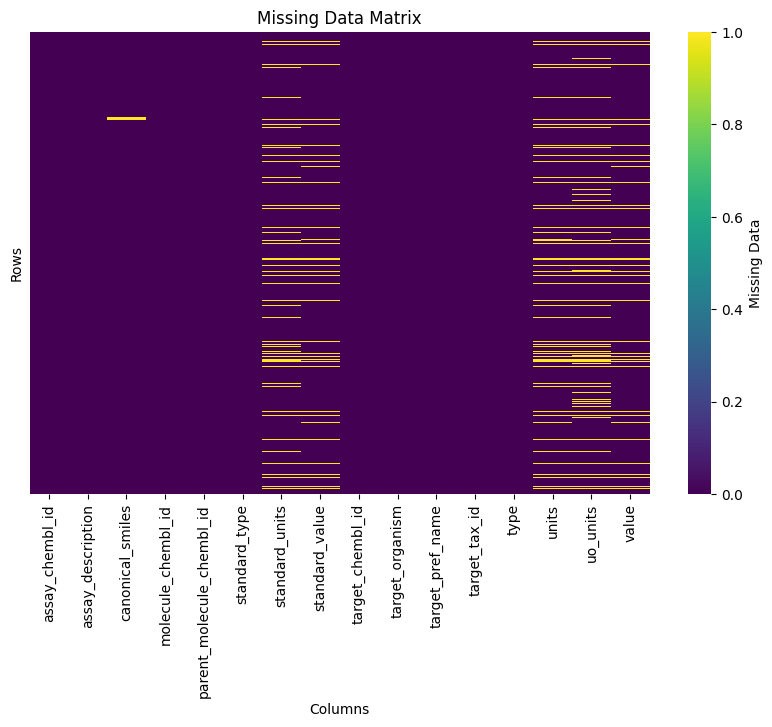

In [ ]:
# Функция для визуализации пропусков
def plot_missing_data_matrix(df):
    plt.figure(figsize=(10, 6))
    sns.heatmap(
        df.isnull(),
        cmap="viridis",
        cbar_kws={'label': 'Missing Data'},
        yticklabels=False
    )
    plt.title("Missing Data Matrix")
    plt.xlabel("Columns")
    plt.ylabel("Rows")
    plt.show()

# Вызов функции визуализации
plot_missing_data_matrix(target_filtered)

In [ ]:
different_types = target_filtered.index[target_filtered['target_organism'] != target_filtered['target_pref_name']].tolist()
different_types

[0,
 1,
 7,
 8,
 11,
 12,
 13,
 14,
 15,
 1920,
 1921,
 2768,
 2769,
 2770,
 2771,
 2772,
 2773,
 2774,
 2775,
 2776,
 2777,
 2778,
 2779,
 2780,
 2781,
 2782,
 2783,
 2784,
 2785,
 2786,
 2787,
 2788,
 2789,
 2790,
 2791,
 2792,
 2793,
 2794,
 2795,
 2796,
 2797,
 2798,
 2799,
 2800,
 2801,
 2802,
 2803,
 2804,
 2805,
 2806,
 2807,
 2808,
 2809,
 2810,
 2811,
 2910,
 3116,
 3117,
 3118,
 3119,
 3120,
 3121,
 3122,
 3194,
 3195,
 3196,
 3343,
 3374,
 3390,
 3411,
 3534,
 3785,
 3823,
 3824,
 3825,
 3826,
 3827,
 3828,
 4060,
 4061,
 4121,
 4141,
 4142,
 4143,
 4144,
 4184,
 4185,
 4186,
 4362,
 4374,
 4477,
 4502,
 4522,
 4532,
 4631,
 4641,
 4683,
 4835,
 4919,
 4923,
 4924,
 4982,
 5032,
 5053,
 5054,
 5098,
 5099,
 5100,
 5148,
 5149,
 5150,
 5151,
 5152,
 5153,
 5154,
 5155,
 5156,
 5157,
 5158,
 5159,
 5224,
 5225,
 5226,
 5227,
 5228,
 5229,
 5230,
 5231,
 5232,
 5233,
 5239,
 5240,
 5241,
 5243,
 5244,
 5245,
 5246,
 5247,
 5248,
 5252,
 5253,
 5260,
 5262,
 5263,
 5264,
 5281,


Мы уже проверили standard_type и type, и parent_molecule_chembl_id с molecule_chembl_id - все они показали что разница есть

Между ними target_pref_name и target_organism отображается как разница, но по факту одинаково


In [ ]:
# target_filtered.iloc[[2170, 2171, 2172]]
specific_rows_columns = target_filtered.loc[[21713,
 21714,
 21715,
 21716,
 21717,
 21718,
 21719,
 21720,
 21721,
 21722,
 21723,
 21724,
 21725,
 21726,
 21727,
 21728,
 21729,
 21730,
 21731,
 21876,
 21877,
 21953,
 21954,
 21955,
 21956,
 21985,
 22005,
 22020,
 22021,
 22048,
 22463,
 22690,
 22700,
 22701,
 22702,
 22721,
 22722,
 22723,
 23143,
 23321,
 23322,
 23323,
 23324,
 23325,
 23326,
 23946,
 23947,
 23948,
 23949,
 23950,
 23951], ['parent_molecule_chembl_id', 'molecule_chembl_id']]
specific_rows_columns

,parent_molecule_chembl_id,molecule_chembl_id
21713,CHEMBL1433,CHEMBL1433
21714,CHEMBL1433,CHEMBL1433
21715,CHEMBL1433,CHEMBL1433
21716,CHEMBL1433,CHEMBL1433
21717,CHEMBL1433,CHEMBL1433
21718,CHEMBL1433,CHEMBL1433
21719,CHEMBL1433,CHEMBL1433
21720,CHEMBL1433,CHEMBL1433
21721,CHEMBL1433,CHEMBL1433
21722,CHEMBL1433,CHEMBL1433


Verifying that the standart type and type don't have differnces between each other

Standard_type is related to activities. Type - to compounds

In [ ]:
similar_check = target_filtered[target_filtered['type']=='IZ']

In [ ]:
target_filtered.to_csv('target_filtered.csv', index=False)

In [ ]:
target_filtered.drop(columns = ['target_pref_name',	'target_chembl_id', 'molecule_chembl_id', 'assay_chembl_id', 'assay_description'], inplace=True)

Get smiles column convert to encoding

In [ ]:
# label_encoder = LabelEncoder()
# encoding_smiles = []
# def tokenize_smiles(smiles_list):
#     # Токенизация каждого SMILES
#     tokens = [list(smile) for smile in smiles_list]
#     # Преобразование символов в числа
#     flattened_tokens = [token for smile in tokens for token in smile]
#     label_encoder.fit(flattened_tokens)
#     transformed = [label_encoder.transform(smile) for smile in tokens]
#     return transformed

In [ ]:
# def pad_sequence(sequence, max_len, pad_value=0):
#     length = len(sequence)
#     padding = torch.tensor([pad_value] * (max_len - length), dtype=sequence.dtype, device=sequence.device) # Create padding as a tensor
#     return torch.cat([sequence, padding]) # Concatenate sequence and padding tensors

# class PadTransform:
#     def __init__(self):
#         pass

#     def __call__(self, sequence, max_len):
#         return pad_sequence(sequence, max_len)

# # Пример использования
# # Максимальная длина SMILES

# transform = PadTransform()

In [ ]:
target_filtered['canonical_smiles']

,canonical_smiles
0,CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(F)ccc1-2
1,CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(F)ccc1-2
2,CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(F)ccc1-2
3,CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(F)ccc1-2
4,CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(F)ccc1-2
...,...
85747,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...
85748,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...
85749,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...
85750,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...


In [ ]:
value_counts = target_filtered['standard_type'].value_counts()
display(value_counts)

,count
standard_type,
MIC,50859
Activity,9177
MIC90,6066
MIC50,5141
IZ,3313
...,...
MIC97,1
logIC50,1
-logMIC,1


In [ ]:
# Подсчет значений и фильтрация тех, что встречаются более 100 раз
filtered_counts = value_counts[value_counts > 100]

# Вывод результата
print("Значения, встречающиеся более 100 раз:")
print(filtered_counts)

Значения, встречающиеся более 100 раз:
standard_type
MIC            50859
Activity        9177
MIC90           6066
MIC50           5141
IZ              3313
MBC             1452
Ratio            954
IC50             890
Inhibition       807
FC               645
MPC              420
log10CFU/ml      364
GI               324
log10cfu         292
Kcat/Km          281
Km               269
Kcat             265
TIME             242
MIC99            228
EC50             201
fT>MIC           199
deltaCT          198
ED50             183
DIZ              182
MBC90            146
PAE              146
CFU              144
MBC50            133
MIC=>90          126
Survival         105
MIC>90           104
FICI             104
Name: count, dtype: int64


In [ ]:
# Создаем маску для значений, которые встречаются 100 раз или более
mask = target_filtered['standard_type'].isin(filtered_counts.index)

# Фильтруем DataFrame, оставляя только те строки, которые соответствуют маске
target_type_filt = target_filtered[mask]
# Выводим результат
target_type_filt.reset_index(drop=True, inplace=True)
display(target_type_filt)

,canonical_smiles,parent_molecule_chembl_id,standard_type,standard_units,standard_value,target_organism,target_tax_id,type,units,uo_units,value
0,CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(F)ccc1-2,CHEMBL407,Inhibition,%,-2.76,Escherichia coli,562.0,Inhibition,%,UO_0000187,-2.76
1,CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(F)ccc1-2,CHEMBL407,Inhibition,%,-2.00,Klebsiella pneumoniae,573.0,Inhibition,%,UO_0000187,-2.00
2,CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(F)ccc1-2,CHEMBL407,Inhibition,%,6.15,Pseudomonas aeruginosa,287.0,Inhibition,%,UO_0000187,6.15
3,CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(F)ccc1-2,CHEMBL407,Inhibition,%,13.44,Acinetobacter baumannii,470.0,Inhibition,%,UO_0000187,13.44
4,CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(F)ccc1-2,CHEMBL407,Inhibition,%,-0.36,Staphylococcus aureus,1280.0,Inhibition,%,UO_0000187,-0.36
...,...,...,...,...,...,...,...,...,...,...,...
83955,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL178,MIC,ug.mL-1,5.00,Bacillus subtilis,1423.0,MIC,ug ml-1,UO_0000274,5.00
83956,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL178,MIC,ug.mL-1,5.00,Corynebacterium diphtheriae,1717.0,MIC,ug ml-1,UO_0000274,5.00
83957,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL178,Activity,/nmol,100.00,Salmonella enterica subsp. enterica serovar Ty...,90371.0,Activity,/nmol,NaN,100.00
83958,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL178,Activity,ug,5.00,Salmonella enterica subsp. enterica serovar Ty...,90371.0,Activity,ug,UO_0000023,5.00


In [ ]:
target_type_filt.dropna(subset=['canonical_smiles'], inplace=True)

<ipython-input-29-813dba2df87b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_type_filt.dropna(subset=['canonical_smiles'], inplace=True)


In [ ]:
# Список показателей, относящихся к концентрации вещества
concentration_metrics = [
    'MIC', 'MBC', 'MIC50', 'MIC90', 'MBC90', 'MBC50', 'MEC', 'MIC80',
    'MIC100', 'MFC', 'MIC95', 'MIC99', 'MIC>90', 'MIC>99', 'IC50',
    'EC50', 'CC50', 'Cmax', 'AUC', 'AUCt', 'Concentration', 'fAUC/MIC',
    'MPC', 'pIC50', 'pKi', 'pKd', 'Ki', 'Kd', 'Log MIC', '-logMIC',
    '-Log MIC', 'Mean MIC', 'Log Ki', 'Log Kd', 'Log IC50', 'Log EC50',
    'Fraction free drug in plasma', 'Fraction unbound in tissue',
    'Plasma clearance', 'CL', 'CLH', 'CL free', 'CLint', 'CLH(app)',
    'Clearance', 'Vdss', 'Vdss(app)', 'Vss', 't1/2', 'T1/2',
    'Beta t1/2', 'alphat1/2', 'T1/2 beta', 'RatioAUC/MIC',
    'Selectivity Index', 'Zone of inhibition', 'Diameter of inhibition zone',
    'DIZ', 'fT>MIC', 'pIC50(mM)', 'IC50(app)', 'Ki app', 'Kd(app)'
]

# Фильтрация строк, где значение в столбце 'Metric' входит в список concentration_metrics
filtered_df = target_type_filt[target_type_filt['standard_type'].isin(concentration_metrics)]
filtered_df.reset_index(drop=True, inplace=True)
# # Перестановка столбцов согласно списку
# filtered_df = filtered_df[concentration_metrics]

# # Сохранение фильтрованного датасета
# filtered_df.to_csv('filtered_dataset.csv', index=False)

display(filtered_df)

,canonical_smiles,parent_molecule_chembl_id,standard_type,standard_units,standard_value,target_organism,target_tax_id,type,units,uo_units,value
0,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL53463,EC50,nM,3688.0,Streptococcus,1301.0,EC50,um,UO_0000065,3.688
1,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL53463,EC50,nM,518.0,Streptococcus sp. 'group A',36470.0,EC50,um,UO_0000065,0.518
2,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL53463,EC50,nM,1149.0,Streptococcus pyogenes serotype M1,301447.0,EC50,um,UO_0000065,1.149
3,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL53463,MIC,nM,10000.0,Escherichia coli,562.0,MIC,uM,UO_0000065,10.000
4,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL53463,MIC,nM,10000.0,Klebsiella pneumoniae,573.0,MIC,uM,UO_0000065,10.000
...,...,...,...,...,...,...,...,...,...,...,...
65603,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL178,MIC,ug.mL-1,5.0,Staphylococcus epidermidis,1282.0,MIC,ug ml-1,UO_0000274,5.000
65604,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL178,MIC,ug.mL-1,5.0,Streptococcus pyogenes,1314.0,MIC,ug ml-1,UO_0000274,5.000
65605,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL178,MIC,ug.mL-1,5.0,Bacillus cereus,1396.0,MIC,ug ml-1,UO_0000274,5.000
65606,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL178,MIC,ug.mL-1,5.0,Bacillus subtilis,1423.0,MIC,ug ml-1,UO_0000274,5.000


In [ ]:
# Выбираем три нужных столбца, например 'A', 'B', и 'C'
dg = filtered_df[['parent_molecule_chembl_id', 'canonical_smiles']]

# Выводим результат
dg

,parent_molecule_chembl_id,canonical_smiles
0,CHEMBL53463,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...
1,CHEMBL53463,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...
2,CHEMBL53463,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...
3,CHEMBL53463,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...
4,CHEMBL53463,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...
...,...,...
65603,CHEMBL178,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...
65604,CHEMBL178,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...
65605,CHEMBL178,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...
65606,CHEMBL178,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...


In [ ]:
dg.drop_duplicates(inplace=True)
# dg.dropna(subset=['canonical_smiles'], inplace=True)

<ipython-input-32-58683d25e491>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dg.drop_duplicates(inplace=True)


In [ ]:
# Создаем новые индексы
dg.reset_index(drop=True, inplace=True)
dg

,parent_molecule_chembl_id,canonical_smiles
0,CHEMBL53463,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...
1,CHEMBL1753,CCC[C@@H]1C[C@@H](C(=O)N[C@@H]([C@H]2O[C@H](SC...
2,CHEMBL3039597,CNC(C)[C@@H]1CC[C@@H](N)[C@@H](O[C@H]2[C@H](O)...
3,CHEMBL1384,NC[C@H]1O[C@H](O[C@H]2[C@H](O)[C@@H](O[C@H]3O[...
4,CHEMBL1167,CN[C@@H]1[C@H](O)[C@H](NC)[C@H]2O[C@@]3(O)C(=O...
...,...,...
260,CHEMBL417,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...
261,CHEMBL1689772,CN(C)c1cc(CNCC(C)(C)C)c(O)c2c1C[C@H]1C[C@H]3[C...
262,CHEMBL1614658,NC(=O)OC[C@@H]1[C@H](NC(=O)/C(=N\OCC(=O)O)c2cs...
263,CHEMBL278315,COC1=C2C[C@@H](C)C[C@H](OC)[C@H](O)[C@@H](C)/C...


In [ ]:
# from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator

def get_descriptor_values(mol, descriptors):
    if mol is None:
        # Return a list of NaNs if the molecule is None
        return [np.nan] * len(descriptors)
    calc = MolecularDescriptorCalculator(descriptors)
    ds = calc.CalcDescriptors(mol)
    return ds

def collect_drug_descriptors(dg):

    # Define the descriptor list
    descriptor_list = Descriptors.descList
    descriptors = [descriptor[0] for descriptor in descriptor_list]

    # Initialize a DataFrame to store descriptors
    descriptors_df = pd.DataFrame(columns=descriptors, index=dg.index)

    # Calculate descriptors for each SMILES string
    for i, smile in enumerate(dg["canonical_smiles"]):
        if pd.isna(smile):
            descriptor_values = [np.nan] * len(descriptors)
        else:
            mol = Chem.MolFromSmiles(smile)
            descriptor_values = get_descriptor_values(mol, descriptors)
        descriptors_df.loc[i] = descriptor_values

    # Merge the original drug data with the descriptors
    drug = pd.concat([dg, descriptors_df], axis=1)

    # # Fill missing values with the mean of the column
    # numeric_cols = dg.select_dtypes(include=np.number).columns
    # dg[numeric_cols] = dg[numeric_cols].fillna(dg[numeric_cols].mean())

    return drug

# Assuming `dg` is the input DataFrame that you already have
# Call the function to collect drug descriptors
drug_data = collect_drug_descriptors(dg)
display(drug_data)

,parent_molecule_chembl_id,canonical_smiles,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CHEMBL53463,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,13.643057,-2.240737,13.643057,0.0,0.227432,579.986,549.746,579.150738,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL1753,CCC[C@@H]1C[C@@H](C(=O)N[C@@H]([C@H]2O[C@H](SC...,12.900963,-1.361938,12.900963,0.147485,0.438273,424.991,391.727,424.179871,...,1,0,0,0,0,0,0,0,0,0
2,CHEMBL3039597,CNC(C)[C@@H]1CC[C@@H](N)[C@@H](O[C@H]2[C@H](O)...,11.129478,-4.666667,11.129478,0.061971,0.05341,1488.807,1362.807,1487.869175,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL1384,NC[C@H]1O[C@H](O[C@H]2[C@H](O)[C@@H](O[C@H]3O[...,10.934371,-1.661605,10.934371,0.084947,0.166854,484.503,448.215,484.238058,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL1167,CN[C@@H]1[C@H](O)[C@H](NC)[C@H]2O[C@@]3(O)C(=O...,12.221,-2.227484,12.221,0.002197,0.36082,332.353,308.161,332.158351,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,CHEMBL417,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,13.643057,-2.240737,13.643057,0.0,0.227432,579.986,549.746,579.150738,...,0,0,0,0,0,0,0,0,0,0
261,CHEMBL1689772,CN(C)c1cc(CNCC(C)(C)C)c(O)c2c1C[C@H]1C[C@H]3[C...,14.058205,-2.656351,14.058205,0.008406,0.28022,556.66,516.34,556.2897,...,0,0,0,0,0,0,0,0,0,0
262,CHEMBL1614658,NC(=O)OC[C@@H]1[C@H](NC(=O)/C(=N\OCC(=O)O)c2cs...,12.556804,-5.020854,12.556804,0.014425,0.106425,466.41,452.298,466.021283,...,0,0,0,0,0,1,0,0,0,0
263,CHEMBL278315,COC1=C2C[C@@H](C)C[C@H](OC)[C@H](O)[C@@H](C)/C...,13.325348,-1.002013,13.325348,0.080112,0.345972,560.644,520.324,560.273381,...,0,0,0,0,0,0,0,0,0,0


Объединяем таблицу с дескрипторами  и таблицу до нее с фильтрацией по типу

In [ ]:
def convert_columns_to_numeric(df, exclude_columns=[]):
    # Применяем pd.to_numeric ко всем столбцам, кроме тех, которые указаны в exclude_columns
    for col in df.columns:
        if col not in exclude_columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')  # Преобразование с заменой ошибок на NaN
    return df

# Пример использования
# Предположим, у тебя есть DataFrame dg, и ты хочешь исключить столбцы "canonical_smiles" и "drug_name" от преобразования
exclude_columns = ['parent_molecule_chembl_id','canonical_smiles']

# Вызываем функцию для преобразования столбцов
drug_descriptors = convert_columns_to_numeric(drug_data, exclude_columns)

# Выводим результат
display(drug_descriptors)

,parent_molecule_chembl_id,canonical_smiles,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CHEMBL53463,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,13.643057,-2.240737,13.643057,0.000000,0.227432,579.986,549.746,579.150738,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL1753,CCC[C@@H]1C[C@@H](C(=O)N[C@@H]([C@H]2O[C@H](SC...,12.900963,-1.361938,12.900963,0.147485,0.438273,424.991,391.727,424.179871,...,1,0,0,0,0,0,0,0,0,0
2,CHEMBL3039597,CNC(C)[C@@H]1CC[C@@H](N)[C@@H](O[C@H]2[C@H](O)...,11.129478,-4.666667,11.129478,0.061971,0.053410,1488.807,1362.807,1487.869175,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL1384,NC[C@H]1O[C@H](O[C@H]2[C@H](O)[C@@H](O[C@H]3O[...,10.934371,-1.661605,10.934371,0.084947,0.166854,484.503,448.215,484.238058,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL1167,CN[C@@H]1[C@H](O)[C@H](NC)[C@H]2O[C@@]3(O)C(=O...,12.221000,-2.227484,12.221000,0.002197,0.360820,332.353,308.161,332.158351,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,CHEMBL417,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,13.643057,-2.240737,13.643057,0.000000,0.227432,579.986,549.746,579.150738,...,0,0,0,0,0,0,0,0,0,0
261,CHEMBL1689772,CN(C)c1cc(CNCC(C)(C)C)c(O)c2c1C[C@H]1C[C@H]3[C...,14.058205,-2.656351,14.058205,0.008406,0.280220,556.660,516.340,556.289700,...,0,0,0,0,0,0,0,0,0,0
262,CHEMBL1614658,NC(=O)OC[C@@H]1[C@H](NC(=O)/C(=N\OCC(=O)O)c2cs...,12.556804,-5.020854,12.556804,0.014425,0.106425,466.410,452.298,466.021283,...,0,0,0,0,0,1,0,0,0,0
263,CHEMBL278315,COC1=C2C[C@@H](C)C[C@H](OC)[C@H](O)[C@@H](C)/C...,13.325348,-1.002013,13.325348,0.080112,0.345972,560.644,520.324,560.273381,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Объединяем таблицы
df_merged = pd.merge(filtered_df, drug_descriptors, on="canonical_smiles", how="left")
df_merged = df_merged.reset_index(drop=True)
# Результат
display(df_merged)

,canonical_smiles,parent_molecule_chembl_id_x,standard_type,standard_units,standard_value,target_organism,target_tax_id,type,units,uo_units,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL53463,EC50,nM,3688.0,Streptococcus,1301.0,EC50,um,UO_0000065,...,0,0,0,0,0,0,0,0,0,0
1,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL53463,EC50,nM,518.0,Streptococcus sp. 'group A',36470.0,EC50,um,UO_0000065,...,0,0,0,0,0,0,0,0,0,0
2,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL53463,EC50,nM,1149.0,Streptococcus pyogenes serotype M1,301447.0,EC50,um,UO_0000065,...,0,0,0,0,0,0,0,0,0,0
3,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL53463,MIC,nM,10000.0,Escherichia coli,562.0,MIC,uM,UO_0000065,...,0,0,0,0,0,0,0,0,0,0
4,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL53463,MIC,nM,10000.0,Klebsiella pneumoniae,573.0,MIC,uM,UO_0000065,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65603,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL178,MIC,ug.mL-1,5.0,Staphylococcus epidermidis,1282.0,MIC,ug ml-1,UO_0000274,...,0,0,0,0,0,0,0,0,0,0
65604,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL178,MIC,ug.mL-1,5.0,Streptococcus pyogenes,1314.0,MIC,ug ml-1,UO_0000274,...,0,0,0,0,0,0,0,0,0,0
65605,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL178,MIC,ug.mL-1,5.0,Bacillus cereus,1396.0,MIC,ug ml-1,UO_0000274,...,0,0,0,0,0,0,0,0,0,0
65606,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL178,MIC,ug.mL-1,5.0,Bacillus subtilis,1423.0,MIC,ug ml-1,UO_0000274,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Сравним значения в столбцах
inconsistent_rows = df_merged[df_merged["parent_molecule_chembl_id_x"] != df_merged["parent_molecule_chembl_id_y"]]
print("Несовпадающие строки:")
print(inconsistent_rows)

Несовпадающие строки:
Empty DataFrame
Columns: [canonical_smiles, parent_molecule_chembl_id_x, standard_type, standard_units, standard_value, target_organism, target_tax_id, type, units, uo_units, value, parent_molecule_chembl_id_y, MaxEStateIndex, MinEStateIndex, MaxAbsEStateIndex, MinAbsEStateIndex, qed, MolWt, HeavyAtomMolWt, ExactMolWt, NumValenceElectrons, NumRadicalElectrons, MaxPartialCharge, MinPartialCharge, MaxAbsPartialCharge, MinAbsPartialCharge, FpDensityMorgan1, FpDensityMorgan2, FpDensityMorgan3, BCUT2D_MWHI, BCUT2D_MWLOW, BCUT2D_CHGHI, BCUT2D_CHGLO, BCUT2D_LOGPHI, BCUT2D_LOGPLOW, BCUT2D_MRHI, BCUT2D_MRLOW, BalabanJ, BertzCT, Chi0, Chi0n, Chi0v, Chi1, Chi1n, Chi1v, Chi2n, Chi2v, Chi3n, Chi3v, Chi4n, Chi4v, HallKierAlpha, Ipc, Kappa1, Kappa2, Kappa3, LabuteASA, PEOE_VSA1, PEOE_VSA10, PEOE_VSA11, PEOE_VSA12, PEOE_VSA13, PEOE_VSA14, PEOE_VSA2, PEOE_VSA3, PEOE_VSA4, PEOE_VSA5, PEOE_VSA6, PEOE_VSA7, PEOE_VSA8, PEOE_VSA9, SMR_VSA1, SMR_VSA10, SMR_VSA2, SMR_VSA3, SMR_VSA4, SMR_

In [ ]:
# Удаляем столбец с суффиксом '_y'
df_merged = df_merged.drop(columns=["parent_molecule_chembl_id_y"])

# Переименовываем столбец '_x' обратно
df_merged = df_merged.rename(columns={"parent_molecule_chembl_id_x": "parent_molecule_chembl_id"})

In [ ]:
df_merged['MolWt']

,MolWt
0,579.986
1,579.986
2,579.986
3,579.986
4,579.986
...,...
65603,527.526
65604,527.526
65605,527.526
65606,527.526


In [ ]:
# df_merged.to_csv('/content/df_merged_final.csv')

In [ ]:
df_merged["MolWt"].isna().sum()

0

In [ ]:
# df_merged2 = df_merged.copy()

In [ ]:
df_merged['standard_value'].interpolate(method='linear', inplace=True)

<ipython-input-86-fa8f617cb635>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged['standard_value'].interpolate(method='linear', inplace=True)


In [ ]:
def convert_to_ug_ml(row):
    unit = row['standard_units']
    value = row['standard_value']
    mol_wt = row['MolWt']  # in g/mol, всегда задано

    if unit in ['ug.mL-1', 'ug ml-1', 'ug m1 l-1']:
        return value
    elif unit in ['mg.ml-1', 'mg/ml', 'mg/L']:
        return value * 1000
    elif unit in ['ng.ml-1', 'ng/ml-1', 'ng/ml']:
        return value * 0.001
    elif unit == 'g.ml-1':
        return value * 1_000_000
    elif unit == 'mg/dL':
        return value * 10
    elif unit == 'pg/ml-1':
        return value * 0.000001
    elif unit == 'g/dL':
        return value * 10_000
    elif unit == 'uL/ml':  # µL/ml эквивалентен mg/ml при плотности воды
        return value * 1000
    elif unit == 'ppm':  # ppm эквивалентен мг/л для воды
        return value * 1
    elif unit == 'nM':  # Новое условие для 'nM'
        return value * mol_wt * 1e-6
    elif unit in ['uM', 'mM', 'mmol/L', 'umol/L', 'mmol/ml','umol/ml', "10'-2micromol/ml", "10'-2 umol/ml",
                  "10'-2microM", "10'-2umol", "10'-2mmol/ml", "10'-3micromol/ml"]:
        factor = {
            'uM': 1e-3,
            'mM': 1,
            'mmol/L': 1,
            'umol/L': 1e-3,
            'umol/ml': 1,
            'mmol/ml': 1e3,  # Добавлено
            "10'-2micromol/ml": 1e-5,
            "10'-2 umol/ml": 1e-5,
            "10'-2microM": 1e-5,
            "10'-2umol": 1e-5,
            "10'-2mmol/ml": 1e-1,
            "10'-3micromol/ml": 1e-6,
        }
        return value * mol_wt * factor[unit]
    elif unit == 'ug mg-1':  # µг/мг
        return None  # Неоднозначное условие, уточнить
    else:
        return None  # Единица не поддерживается

In [ ]:
# Apply conversion
df_merged['value_in_ug_ml'] = df_merged.apply(convert_to_ug_ml, axis=1)

display(df_merged)

,canonical_smiles,parent_molecule_chembl_id,standard_type,standard_units,standard_value,target_organism,target_tax_id,type,units,uo_units,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,value_in_ug_ml
0,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL53463,EC50,nM,3688.0,Streptococcus,1301.0,EC50,um,UO_0000065,...,0,0,0,0,0,0,0,0,0,2.138988
1,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL53463,EC50,nM,518.0,Streptococcus sp. 'group A',36470.0,EC50,um,UO_0000065,...,0,0,0,0,0,0,0,0,0,0.300433
2,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL53463,EC50,nM,1149.0,Streptococcus pyogenes serotype M1,301447.0,EC50,um,UO_0000065,...,0,0,0,0,0,0,0,0,0,0.666404
3,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL53463,MIC,nM,10000.0,Escherichia coli,562.0,MIC,uM,UO_0000065,...,0,0,0,0,0,0,0,0,0,5.799860
4,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL53463,MIC,nM,10000.0,Klebsiella pneumoniae,573.0,MIC,uM,UO_0000065,...,0,0,0,0,0,0,0,0,0,5.799860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65603,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL178,MIC,ug.mL-1,5.0,Staphylococcus epidermidis,1282.0,MIC,ug ml-1,UO_0000274,...,0,0,0,0,0,0,0,0,0,5.000000
65604,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL178,MIC,ug.mL-1,5.0,Streptococcus pyogenes,1314.0,MIC,ug ml-1,UO_0000274,...,0,0,0,0,0,0,0,0,0,5.000000
65605,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL178,MIC,ug.mL-1,5.0,Bacillus cereus,1396.0,MIC,ug ml-1,UO_0000274,...,0,0,0,0,0,0,0,0,0,5.000000
65606,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL178,MIC,ug.mL-1,5.0,Bacillus subtilis,1423.0,MIC,ug ml-1,UO_0000274,...,0,0,0,0,0,0,0,0,0,5.000000


In [ ]:
df_merged['standard_units'].unique()

array(['nM', 'ug.mL-1', 'ug ml-1', 'mmol/ml', 'mg/L', 'uM', 'uL/ml',
       'umol/L', 'mg/ml', '%', 'ug cm**-2', 'mM', 'ug',
       "10'-2micromol/ml", "10'-2 umol/ml", 'umol/ml', "10'-2mmol/ml",
       "10'-2microM", 'ug mg-1', 'ppm', 'mm/mg', 'microg', 'ug m1 l-1',
       'mg', 'ng/ml', 'ug/sq.cm', "10'-3micromol/ml", "10'-2umol"],
      dtype=object)

In [ ]:
# # Conversion factors to µg/ml-1
# def convert_to_ug_ml(row):
#     unit = row['standard_units']
#     value = row['standard_value']
#     mol_wt = row['MolWt']  # in g/mol

#     if unit == 'ug.mL-1':
#         return value
#     elif unit == 'mg.ml-1':
#         return value * 1000
#     elif unit == 'mg/ml':
#         return value * 1000
#     elif unit == 'ug ml-1':
#         return value
#     elif unit == 'ng.ml-1':
#         return value * 0.001
#     elif unit == 'g.ml-1':
#         return value * 1_000_000
#     elif unit == 'mg/L':
#         return value
#     elif unit == 'mg/dL':
#         return value * 10
#     elif unit == 'uM' and mol_wt is not None:
#         return value * mol_wt  # convert to µg/ml-1
#     elif unit == 'mM' and mol_wt is not None:
#         return value * (mol_wt * 1)  # convert to µg/ml-1
#     elif unit == 'mmol/L' and mol_wt is not None:
#         return value * (mol_wt)  # convert to µg/ml-1
#     elif unit == 'mmol/ml' and mol_wt is not None:
#         return value * mol_wt * 0.001  # convert to µg/ml-1
#     elif unit == 'nM' and mol_wt is not None:
#         return value * mol_wt * 0.001  # convert to µg/ml-1
#     elif unit == 'pg/ml-1':
#         return value * 0.001
#     elif unit == 'ng/ml-1':
#         return value * 0.001
#     elif unit == 'g/dL':
#         return value * 10000
#     elif unit == 'uL/ml':  # µL/ml эквивалентен mg/ml при плотности воды
#         return value * 1e3

#     elif unit == 'umol/L':  # Моль/литр -> µг/мл
#         return value * mol_wt

#     elif unit == 'umol/ml':  # Моль/мл -> µг/мл
#         return value * mol_wt * 1e3

#     elif unit in ["10'-2micromol/ml", "10'-2 umol/ml", "10'-2microM", "10'-2umol"]:  # 10^-2 мольные единицы
#         return value * mol_wt * 1e-2

#     elif unit == "10'-2mmol/ml":  # 10^-2 ммоль/мл -> µг/мл
#         return value * mol_wt * 1e1

#     elif unit == "10'-3micromol/ml":  # 10^-3 моль/мл -> µг/мл
#         return value * mol_wt * 1e-3

#     elif unit == 'ug mg-1':  # µг/мг
#         return value  # Предполагается, что µг/мг уже в корректной форме

#     elif unit == 'ppm':  # ppm эквивалентен мг/л для воды
#         return value * 1e3

#     elif unit == 'ug m1 l-1':  # µг/мл
#         return value

#     elif unit == 'ng/ml':  # нг/мл -> µг/мл
#         return value * 1e-3
#     else:
#         return None  # Handle cases where conversion is not defined

# # Apply conversion
# df_merged2['value_in_ug_ml'] = df_merged2.apply(convert_to_ug_ml, axis=1)

# display(df_merged2)

,canonical_smiles,parent_molecule_chembl_id,standard_type,standard_units,standard_value,target_organism,target_tax_id,type,units,uo_units,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,value_in_ug_ml
0,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL53463,EC50,nM,3688.0,Streptococcus,1301.0,EC50,um,UO_0000065,...,0,0,0,0,0,0,0,0,0,2138.988368
1,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL53463,EC50,nM,518.0,Streptococcus sp. 'group A',36470.0,EC50,um,UO_0000065,...,0,0,0,0,0,0,0,0,0,300.432748
2,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL53463,EC50,nM,1149.0,Streptococcus pyogenes serotype M1,301447.0,EC50,um,UO_0000065,...,0,0,0,0,0,0,0,0,0,666.403914
3,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL53463,MIC,nM,10000.0,Escherichia coli,562.0,MIC,uM,UO_0000065,...,0,0,0,0,0,0,0,0,0,5799.860000
4,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL53463,MIC,nM,10000.0,Klebsiella pneumoniae,573.0,MIC,uM,UO_0000065,...,0,0,0,0,0,0,0,0,0,5799.860000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65603,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL178,MIC,ug.mL-1,5.0,Staphylococcus epidermidis,1282.0,MIC,ug ml-1,UO_0000274,...,0,0,0,0,0,0,0,0,0,5.000000
65604,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL178,MIC,ug.mL-1,5.0,Streptococcus pyogenes,1314.0,MIC,ug ml-1,UO_0000274,...,0,0,0,0,0,0,0,0,0,5.000000
65605,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL178,MIC,ug.mL-1,5.0,Bacillus cereus,1396.0,MIC,ug ml-1,UO_0000274,...,0,0,0,0,0,0,0,0,0,5.000000
65606,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL178,MIC,ug.mL-1,5.0,Bacillus subtilis,1423.0,MIC,ug ml-1,UO_0000274,...,0,0,0,0,0,0,0,0,0,5.000000


In [ ]:
df_merged = df_merged.dropna(subset=['standard_units'])

In [ ]:
# Значения, которые нужно удалить
values_to_remove = ["microg", "ug", "mg", "%", "ug/sq.cm", "ug cm**-2","mm/mg","ug mg-1"]

# Удаление строк с указанными значениями
df_filtered = df_merged[~df_merged["standard_units"].isin(values_to_remove)]

In [ ]:
df_filtered['standard_units'].unique()

array(['nM', 'ug.mL-1', 'ug ml-1', 'mmol/ml', 'mg/L', 'uM', 'uL/ml',
       'umol/L', 'mg/ml', 'mM', "10'-2micromol/ml", "10'-2 umol/ml",
       'umol/ml', "10'-2mmol/ml", "10'-2microM", 'ppm', 'ug m1 l-1',
       'ng/ml', "10'-3micromol/ml", "10'-2umol"], dtype=object)

In [ ]:
df_filtered['value_in_ug_ml'].isnull().sum()

0

In [ ]:
# result = df_filtered[df_filtered["units"] == "ug mg-1"]
# print(len(result))

In [ ]:
filtered_df = df_filtered[df_filtered["value_in_ug_ml"].isna()]
filtered_df['standard_units'].unique()
filtered_df

,canonical_smiles,parent_molecule_chembl_id,standard_type,standard_units,standard_value,target_organism,target_tax_id,type,units,uo_units,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,value_in_ug_ml


In [ ]:
# sns.regplot(x=df_merged.index, y='standard_value', data=df_merged)
# plt.title("Regression Plot")
# plt.show()

In [ ]:
# plt.plot(np.arange(len(df_merged)), df_merged['standard_value'], label='Standard Value')
# plt.xlabel('Index')  # Опционально: подпись оси X
# plt.ylabel('Standard Value')  # Опционально: подпись оси Y
# plt.legend()  # Отображение легенды
# plt.show()

In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63424 entries, 0 to 65607
Columns: 220 entries, canonical_smiles to value_in_ug_ml
dtypes: float64(108), int64(104), object(8)
memory usage: 106.9+ MB


In [ ]:
df_filtered

,canonical_smiles,parent_molecule_chembl_id,standard_type,standard_units,standard_value,target_organism,target_tax_id,type,units,uo_units,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,value_in_ug_ml
0,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL53463,EC50,nM,3688.0,Streptococcus,1301.0,EC50,um,UO_0000065,...,0,0,0,0,0,0,0,0,0,2.138988
1,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL53463,EC50,nM,518.0,Streptococcus sp. 'group A',36470.0,EC50,um,UO_0000065,...,0,0,0,0,0,0,0,0,0,0.300433
2,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL53463,EC50,nM,1149.0,Streptococcus pyogenes serotype M1,301447.0,EC50,um,UO_0000065,...,0,0,0,0,0,0,0,0,0,0.666404
3,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL53463,MIC,nM,10000.0,Escherichia coli,562.0,MIC,uM,UO_0000065,...,0,0,0,0,0,0,0,0,0,5.799860
4,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL53463,MIC,nM,10000.0,Klebsiella pneumoniae,573.0,MIC,uM,UO_0000065,...,0,0,0,0,0,0,0,0,0,5.799860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65603,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL178,MIC,ug.mL-1,5.0,Staphylococcus epidermidis,1282.0,MIC,ug ml-1,UO_0000274,...,0,0,0,0,0,0,0,0,0,5.000000
65604,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL178,MIC,ug.mL-1,5.0,Streptococcus pyogenes,1314.0,MIC,ug ml-1,UO_0000274,...,0,0,0,0,0,0,0,0,0,5.000000
65605,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL178,MIC,ug.mL-1,5.0,Bacillus cereus,1396.0,MIC,ug ml-1,UO_0000274,...,0,0,0,0,0,0,0,0,0,5.000000
65606,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL178,MIC,ug.mL-1,5.0,Bacillus subtilis,1423.0,MIC,ug ml-1,UO_0000274,...,0,0,0,0,0,0,0,0,0,5.000000


In [ ]:
df_filtered.reset_index(drop=True, inplace=True)

In [ ]:
df_filtered

,canonical_smiles,parent_molecule_chembl_id,standard_type,standard_units,standard_value,target_organism,target_tax_id,type,units,uo_units,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,value_in_ug_ml
0,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL53463,EC50,nM,3688.0,Streptococcus,1301.0,EC50,um,UO_0000065,...,0,0,0,0,0,0,0,0,0,2.138988
1,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL53463,EC50,nM,518.0,Streptococcus sp. 'group A',36470.0,EC50,um,UO_0000065,...,0,0,0,0,0,0,0,0,0,0.300433
2,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL53463,EC50,nM,1149.0,Streptococcus pyogenes serotype M1,301447.0,EC50,um,UO_0000065,...,0,0,0,0,0,0,0,0,0,0.666404
3,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL53463,MIC,nM,10000.0,Escherichia coli,562.0,MIC,uM,UO_0000065,...,0,0,0,0,0,0,0,0,0,5.799860
4,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL53463,MIC,nM,10000.0,Klebsiella pneumoniae,573.0,MIC,uM,UO_0000065,...,0,0,0,0,0,0,0,0,0,5.799860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63419,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL178,MIC,ug.mL-1,5.0,Staphylococcus epidermidis,1282.0,MIC,ug ml-1,UO_0000274,...,0,0,0,0,0,0,0,0,0,5.000000
63420,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL178,MIC,ug.mL-1,5.0,Streptococcus pyogenes,1314.0,MIC,ug ml-1,UO_0000274,...,0,0,0,0,0,0,0,0,0,5.000000
63421,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL178,MIC,ug.mL-1,5.0,Bacillus cereus,1396.0,MIC,ug ml-1,UO_0000274,...,0,0,0,0,0,0,0,0,0,5.000000
63422,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL178,MIC,ug.mL-1,5.0,Bacillus subtilis,1423.0,MIC,ug ml-1,UO_0000274,...,0,0,0,0,0,0,0,0,0,5.000000


In [ ]:
# # Create a scatter plot
# plt.figure(figsize=(6, 4))
# sns.scatterplot(x='', y='standard_value', data=tips, hue='time', style='time')
# plt.title('Total Bill vs Tip')
# plt.xlabel('Total Bill')
# plt.ylabel('Tip')
# plt.show()

In [ ]:
# filtered_df_array = np.array(filtered_df['standard_units'])
# print(filtered_df_array)

In [ ]:
df_filtered.to_csv('/content/df_filtered_final.csv')

In [ ]:
# # Инициализация LabelEncoder
# label_encoder = LabelEncoder()
# df_smlcode = pd.DataFrame()
# # Применение кодирования к столбцу SMILES
# # Указываем столбец, который нужно исключить
# column_to_exclude = ["canonical_smiles", 'standard_type', 'standard_units', 'target_organism', 'type', 'units']

# # Копируем все столбцы, кроме указанного
# df_smlcode = df_merged2.loc[:, df_merged2.columns != column_to_exclude]
# df_smlcode['smiles_encoded'] = label_encoder.fit_transform(df_merged2.column_to_exclude)
# # Удаление оригинального столбца SMILES
# # target_filtered = target_filtered.drop(columns=['canonical_smiles'])
# display(df_smlcode)